# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.



You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
import os
import numpy as np
from torchvision import transforms, datasets
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import workspace_utils

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# For image loading later
batch_size = 20
num_workers = 0
valid_set_size = 0.2

# Creates the directories for test and training data
data_dir = '/data/landmark_images'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')

# Create the transformations for the images
transform = transforms.Compose([
    transforms.RandomResizedCrop(512),
    transforms.ToTensor(), # Turn to tensor object
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize in all image dimensions with mean & std of 0.5
])

# Loads in the test and training data
train_data = datasets.ImageFolder(train_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)

# Create a random split for training and validation sets
np.random.seed(42)
length = len(train_data)
indicies = list(range(length))
np.random.shuffle(indicies)
split = int(np.floor(length * valid_set_size))
valid_idx, train_idx = indicies[:split], indicies[split:]

# Establsih samples for traing and validation sets
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# Establish dataloader's for training, validation, and testing sets
train_loader = DataLoader(train_data, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers)
valid_loader = DataLoader(train_data, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers)
test_loader = DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**:

- My code resizes the images by cropping random portions of the images to a size of 512x512 forming a square image. I choose to have the input tensor's be 512x512 because I looked at the images and saw that most pictures were around 800x600 so I wanted to resize to something smaller than those dimensions and have the final images be square.

- I did not augment the data set because my thought process is the data is already very varied as far as locations, angles, and perspectives so changing the data further seems like it will add very little information for the network to pick up on later and make it more difficult to detech locations.

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

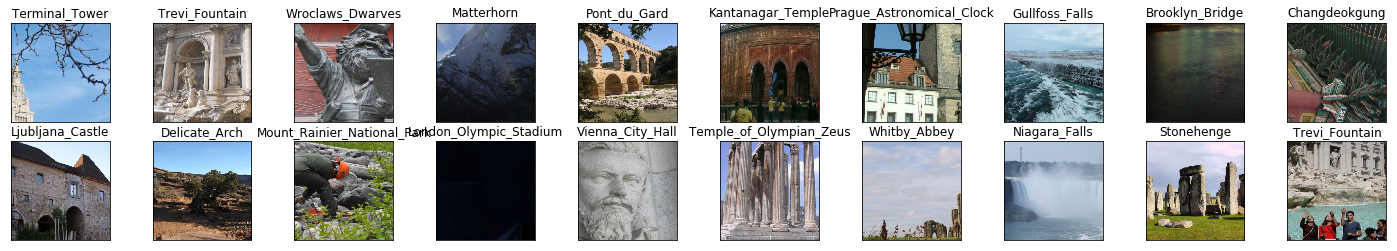

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

# Create a list of the different classes of locations
classes = []
for entry in train_data.classes:
    idx, loc_name = entry.split('.') # Grabs the name of a location
    classes.append(loc_name)

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# Figure to plot the images on
fig = plt.figure(figsize=(25, 4))

# Plot a single batch of images
for idx in range(batch_size):
    # Create a subplot to plot the image
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    
    # Unnormalize the image
    img = images[idx]
    img = img/2 + 0.5
    
    # Plot the image
    plt.imshow(np.transpose(img, (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

### Initialize use_cuda variable

In [3]:
import torch
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [4]:
import torch.nn as nn
import torch.optim as optim
## TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    return optimizer
    

In [5]:
len(classes)

50

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [6]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(4, 4)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(128 * 8 * 8, 500)
        self.fc2 = nn.Linear(500, 50)

    def forward(self, x):
        ## Define forward behavior
        # (3 -> 16 feature maps) & (512x512 -> 128x128)
        x = self.pool(F.relu(self.conv1(x)))
        # (16 -> 32 feature maps) & (128x128 -> 32x32)
        x = self.pool(F.relu(self.conv2(x)))
        # (32 -> 64 feature maps) & (32x32 -> 8x8 )
        x = self.pool(F.relu(self.conv3(x)))
        # (64 -> 128 feature maps) & (8x8 -> 8x8)
        x = F.relu(self.conv4(x))
        
        # print(x.shape)
        # Transform to a vector
        x = x.view(-1, 128 * 8 * 8)
        
        # Fully connected layers
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  I made network convolutonal layers with pooling/relu opertions applied after each convolutional pass and 2 fully connected layers with dropout. The reason I kept the network this size is because it seemed like increasing size would require too much memory and more computational power to train the network in what I consider to be a reasonalble amount of time. I added dropout to decrease overtraining and make the network more robust. 

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [7]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            # Set optimizer gradient to zero
            optimizer.zero_grad()
            # Pass the data to the model get the output
            output = model(data)
            # Calculation the loss
            loss = criterion(output, target)
            # Calculate the gradient
            loss.backward()
            # Update the weights
            optimizer.step()
            # Update the training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss
            # Get the model predictions/logits
            output = model(data)
            # Calculate the loss
            loss = criterion(output, target)
            # Calculate the validation loss
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))
            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} -> {:.6f}). Saving model...'.format(
                valid_loss_min,
                valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss

        
        
    return model

In [8]:
model_scratch.conv1.weight.shape

torch.Size([16, 3, 3, 3])

In [9]:
model_scratch.conv1.weight.shape

torch.Size([16, 3, 3, 3])

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [24]:
from workspace_utils import active_session

def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    if isinstance(m, nn.Linear):
        y = m.in_features
        std = 1/np.sqrt(y)
        m.weight.data.normal_(0, std)
        m.bias.data.fill_(0)
    if isinstance(m, nn.Conv2d):
        y = 1
        for dim in range(1, len(m.weight.shape)):
            y *= m.weight.shape[dim]
        nn.init.normal_(m.weight, mean=0, std=1/np.sqrt(y))
        

    
    
with active_session():
    #-#-# Do NOT modify the code below this line. #-#-#

    model_scratch.apply(custom_weight_init)
    model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                          criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 3.903833 	Validation Loss: 3.878267
Validation loss decreased (inf -> 3.878267). Saving model...
Epoch: 2 	Training Loss: 3.845885 	Validation Loss: 3.794670
Validation loss decreased (3.878267 -> 3.794670). Saving model...
Epoch: 3 	Training Loss: 3.755822 	Validation Loss: 3.701164
Validation loss decreased (3.794670 -> 3.701164). Saving model...
Epoch: 4 	Training Loss: 3.665021 	Validation Loss: 3.678234
Validation loss decreased (3.701164 -> 3.678234). Saving model...
Epoch: 5 	Training Loss: 3.606801 	Validation Loss: 3.599449
Validation loss decreased (3.678234 -> 3.599449). Saving model...
Epoch: 6 	Training Loss: 3.532845 	Validation Loss: 3.560143
Validation loss decreased (3.599449 -> 3.560143). Saving model...
Epoch: 7 	Training Loss: 3.486892 	Validation Loss: 3.487685
Validation loss decreased (3.560143 -> 3.487685). Saving model...
Epoch: 8 	Training Loss: 3.426312 	Validation Loss: 3.433023
Validation loss decreased (3.487685 -> 3.433023). Savin

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [27]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 100

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

with active_session():
    # train the model
    model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                          criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.912220 	Validation Loss: 3.912008
Validation loss decreased (inf -> 3.912008). Saving model...
Epoch: 2 	Training Loss: 3.911065 	Validation Loss: 3.911368
Validation loss decreased (3.912008 -> 3.911368). Saving model...
Epoch: 3 	Training Loss: 3.909739 	Validation Loss: 3.910686
Validation loss decreased (3.911368 -> 3.910686). Saving model...
Epoch: 4 	Training Loss: 3.907062 	Validation Loss: 3.908185
Validation loss decreased (3.910686 -> 3.908185). Saving model...
Epoch: 5 	Training Loss: 3.900087 	Validation Loss: 3.900007
Validation loss decreased (3.908185 -> 3.900007). Saving model...
Epoch: 6 	Training Loss: 3.879420 	Validation Loss: 3.861965
Validation loss decreased (3.900007 -> 3.861965). Saving model...
Epoch: 7 	Training Loss: 3.822483 	Validation Loss: 3.803667
Validation loss decreased (3.861965 -> 3.803667). Saving model...
Epoch: 8 	Training Loss: 3.780161 	Validation Loss: 3.807475
Epoch: 9 	Training Loss: 3.756594 	Validation Loss: 3.7

Epoch: 87 	Training Loss: 1.567892 	Validation Loss: 2.899850
Epoch: 88 	Training Loss: 1.567965 	Validation Loss: 2.746227
Epoch: 89 	Training Loss: 1.566285 	Validation Loss: 2.807855
Epoch: 90 	Training Loss: 1.531520 	Validation Loss: 2.758199
Epoch: 91 	Training Loss: 1.537148 	Validation Loss: 2.786772
Epoch: 92 	Training Loss: 1.472860 	Validation Loss: 2.885344
Epoch: 93 	Training Loss: 1.518817 	Validation Loss: 2.700497
Validation loss decreased (2.722081 -> 2.700497). Saving model...
Epoch: 94 	Training Loss: 1.495972 	Validation Loss: 2.834321
Epoch: 95 	Training Loss: 1.458828 	Validation Loss: 2.781152
Epoch: 96 	Training Loss: 1.423566 	Validation Loss: 2.776850
Epoch: 97 	Training Loss: 1.420817 	Validation Loss: 2.697124
Validation loss decreased (2.700497 -> 2.697124). Saving model...
Epoch: 98 	Training Loss: 1.388591 	Validation Loss: 2.779982
Epoch: 99 	Training Loss: 1.393741 	Validation Loss: 2.742143
Epoch: 100 	Training Loss: 1.404948 	Validation Loss: 2.779643

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [10]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.648871


Test Accuracy: 38% (484/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [11]:
import os
import numpy as np
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Data Directory locations
loc_dir = '/data/landmark_images/'
data_dir = os.path.join(loc_dir, 'train/')
test_dir = os.path.join(loc_dir, 'test/')

# Dataloader arguments
batch_size = 20
num_workers = 0
valid_set_size = 0.2


# Create the transformations
transform = transforms.Compose([
    transforms.RandomResizedCrop(512),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load data into files
train_data = datasets.ImageFolder(data_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)

# Create indicies for testing and validation sets
np.random.seed(42)
length = len(train_data)
indicies = list(range(length))
np.random.shuffle(indicies)
split = int(np.floor(length * valid_set_size))
valid_idx, train_idx = indicies[:split], indicies[split:]

# Create samplers for testing and validation sets
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# Create dataloaders
train_loader = DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, sampler=train_sampler)
valid_loader = DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, sampler=valid_sampler)
test_loader = DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [12]:
import torch.nn as nn
import torch.optim as optim

## TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()


def get_optimizer_transfer(model):
    ## TODO: select and return optimizer
    optimzer = optim.SGD(model.classifier.parameters(), lr=0.001, momentum=0.9)
    return optimzer
    
    

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [13]:
from torchvision import models
## TODO: Specify model architecture

model_transfer = models.vgg16(pretrained=True)

# Freeze the gradient for the layers in the features section
for param in model_transfer.features.parameters():
    param.requires_grad = False

# Replace the first fully connected classifier layer
n_outputs = model_transfer.classifier[0].out_features
model_transfer.classifier[0] = nn.Linear(131072, n_outputs)
    

# Replace the final output layer with a new layer with appropirate outputs
n_inputs = model_transfer.classifier[6].in_features
model_transfer.classifier[6] = nn.Linear(n_inputs, len(classes))


#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

In [10]:
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [14]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  The only two layers I felt I needed to change were the first and last layers of the classifier portion of the neural network of vgg16. I used vgg16 since I was familiar with it from the video examples and know it makes a great classification network composed of layers I learned about in this nanodegree program. I changed the first layer of the classifier because the original input gets flattened to something different than what the network expects. Next, I changed the last layer to have 50 outputs corresponding to the 50 locations we are trying to classify instead of the 1000 outputs of the original vgg16 network.

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [2]:
from workspace_utils import active_session

# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'

num_epochs = 10
with active_session():
    # train the model
    model_transfer = train(num_epochs, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer), 
                          criterion_transfer, use_cuda, 'model_transfer.pt')


#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [15]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.135507


Test Accuracy: 69% (867/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [72]:
import cv2
from PIL import Image

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    
    # Lod the image and perform the apprpriate transformations to the data
    img = Image.open(img_path)
    img = transform(img)
    img = torch.unsqueeze(img, 0).cuda()
    
    # Pass the image data to the network to get the predictions
    model_transfer.eval()
    output = model_transfer(img)
    
    # Get the top k values and the corresponding indexes
    top_preds, ind_pred = output.data.topk(k)
    
    # Get the class predictions
    class_predictions = []
    for ind in ind_pred[0]:
        class_predictions.append(classes[ind])
    
    # Return the class predictions
    return class_predictions
    

# test on a sample image
predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

['Golden_Gate_Bridge',
 'Brooklyn_Bridge',
 'Dead_Sea',
 'Forth_Bridge',
 'Sydney_Harbour_Bridge']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

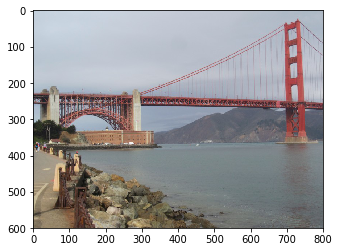

Is this a picture of the
Golden_Gate_Bridge, Brooklyn_Bridge, or Forth_Bridge?


In [76]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions
    # Load the image data
    img = Image.open(img_path)
    
    # Plot the image data and display the output
    plt.clf()
    plt.imshow(img)
    plt.show()
    
    # Create the the text output and print it 
    text = "Is this a picture of the\n{}, {}, or {}?".format(predicted_landmarks[0],
                                                             predicted_landmarks[1],
                                                             predicted_landmarks[2])
    print(text)
    
    

# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

The output is better than I expected. Three things I could do better is let the network train for longer since I only let it run for 11 epochs and wanted it to run longer but the process got interrupted. I could also tweak the data and apply rotations to possibly make the network more robust. A third thing I could do would be to get more photos of the locations so the network could train in more data.

__Answer:__ (Three possible points for improvement)

In [82]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.

# Load images to look at
my_four_images = datasets.ImageFolder('my_images/', transform=transform)

torch.Size([3, 512, 512]) 1
torch.Size([3, 512, 512]) 2
torch.Size([3, 512, 512]) 3
torch.Size([3, 512, 512]) 4


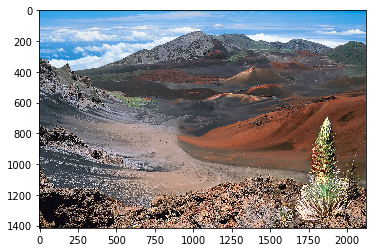

Is this a picture of the
Death_Valley_National_Park, Haleakala_National_Park, or Banff_National_Park?


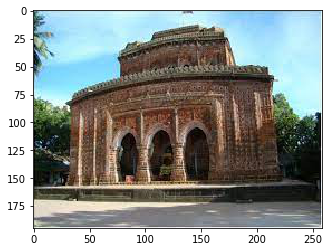

Is this a picture of the
Kantanagar_Temple, Gateway_of_India, or Taj_Mahal?


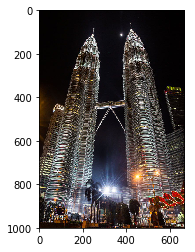

Is this a picture of the
Petronas_Towers, Brooklyn_Bridge, or Terminal_Tower?


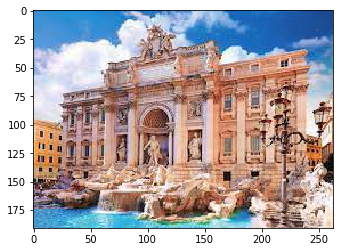

Is this a picture of the
Trevi_Fountain, Kantanagar_Temple, or Temple_of_Olympian_Zeus?


In [92]:
for img, idx in iter(my_four_images):
    print(img.size(), idx)

# Image locations in the current working directory
img_locs = ['my_images/Haleakala_National_Park/Haleakala_National_Park.jpg',
            'my_images/Kantaji-Temple/Kantaji-Temple.png',
            'my_images/Petronas_Towers/Petronas_Towers.jpg',
            'my_images/Trevi_Fountain/Trevi_Fountain.png']
 
# Apply the suggested_locations function to my images that I downloaded off of google
for img in img_locs:
    suggest_locations(img)



